In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv("Historical Apple.csv")

In [ ]:
#observing your data and getting to know what you are working with 

In [17]:
df.head()

,Unnamed: 0,price,high,count_agg,low,open,change,date,timestamp
0,0,116.15,116.33,0,114.76,115.80,0.28,01-01-2017 00:00:00,1.483229e+09
1,1,116.15,116.33,0,114.76,115.80,0.28,02-01-2017 00:00:00,1.483315e+09
2,2,116.15,116.33,0,114.76,115.80,0.28,03-01-2017 00:00:00,1.483402e+09
3,3,116.15,116.33,1,114.76,115.80,0.28,04-01-2017 00:00:00,1.483488e+09
4,4,116.02,116.51,1,115.75,115.85,-0.11,05-01-2017 00:00:00,1.483574e+09


In [18]:
df.tail()

,Unnamed: 0,price,high,count_agg,low,open,change,date,timestamp
1404,1404,119.03,119.620000,1,116.880000,118.000000,3.55,06-11-2020 00:00:00,1.604621e+09
1405,1405,118.69,119.200000,1,116.130000,118.410000,-0.29,07-11-2020 00:00:00,1.604707e+09
1406,1406,117.90,120.126667,0,116.126667,119.106667,-0.86,08-11-2020 00:00:00,1.604794e+09
1407,1407,117.11,121.053333,0,116.123333,119.803333,-1.43,09-11-2020 00:00:00,1.604880e+09
1408,1408,116.32,121.980000,1,116.120000,120.500000,-2.00,10-11-2020 00:00:00,1.604966e+09


In [20]:
df.shape

(1409, 9)

In [12]:
df.describe()

,Unnamed: 0,price,high,count_agg,low,open,change,timestamp
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1.409000e+03
mean,704.000000,204.584294,206.493762,0.655075,202.369038,204.288662,0.127832,1.544104e+09
std,406.887577,71.720387,72.539062,0.488770,70.467390,71.386066,1.863470,3.519168e+07
min,0.000000,108.220000,110.120000,0.000000,103.500000,104.340000,-12.860000,1.483229e+09
25%,352.000000,156.820000,158.050000,0.000000,155.440000,156.910000,-0.570000,1.513642e+09
50%,704.000000,185.160000,186.533333,1.000000,183.420000,185.140000,0.143333,1.544141e+09
75%,1056.000000,223.970000,226.440000,1.000000,220.770000,224.790000,1.000000,1.574554e+09
max,1408.000000,506.090000,515.140000,3.000000,500.410000,514.790000,11.980000,1.604966e+09


In [23]:
df.columns

Index(['Unnamed: 0', 'price', 'high', 'count_agg', 'low', 'open', 'change',
       'date', 'timestamp'],
      dtype='object')

In [24]:
df.nunique

<bound method DataFrame.nunique of       Unnamed: 0   price        high  count_agg         low        open  \
0              0  116.15  116.330000          0  114.760000  115.800000   
1              1  116.15  116.330000          0  114.760000  115.800000   
2              2  116.15  116.330000          0  114.760000  115.800000   
3              3  116.15  116.330000          1  114.760000  115.800000   
4              4  116.02  116.510000          1  115.750000  115.850000   
...          ...     ...         ...        ...         ...         ...   
1404        1404  119.03  119.620000          1  116.880000  118.000000   
1405        1405  118.69  119.200000          1  116.130000  118.410000   
1406        1406  117.90  120.126667          0  116.126667  119.106667   
1407        1407  117.11  121.053333          0  116.123333  119.803333   
1408        1408  116.32  121.980000          1  116.120000  120.500000   

      change                 date     timestamp  
0       0.28  

In [29]:
#cleaning the data before you analyze

In [31]:
df_dropped=df.drop(columns=(["Unnamed: 0", "count_agg", "timestamp"]), axis=1)
df_dropped.head()

,price,high,low,open,change,date
0,116.15,116.33,114.76,115.80,0.28,01-01-2017 00:00:00
1,116.15,116.33,114.76,115.80,0.28,02-01-2017 00:00:00
2,116.15,116.33,114.76,115.80,0.28,03-01-2017 00:00:00
3,116.15,116.33,114.76,115.80,0.28,04-01-2017 00:00:00
4,116.02,116.51,115.75,115.85,-0.11,05-01-2017 00:00:00


In [45]:
import datetime

In [58]:
def convert_date_to_year(string):
    return datetime.datetime.strptime(string, '%d-%m-%Y %H:%M:%S').year

In [60]:
def convert_date_to_month(string):
    return datetime.datetime.strptime(string, '%d-%m-%Y %H:%M:%S').month

In [62]:
df_dropped=df_dropped.assign(Year = df_dropped.get("date").apply(convert_date_to_year))
df_dropped=df_dropped.assign(Month = df_dropped.get("date").apply(convert_date_to_month))

In [63]:
df_dropped.isnull().sum()

price     0
high      0
low       0
open      0
change    0
date      0
Year      0
Month     0
dtype: int64

In [ ]:
# relationship analysis

In [64]:
correlation = df_dropped.corr()

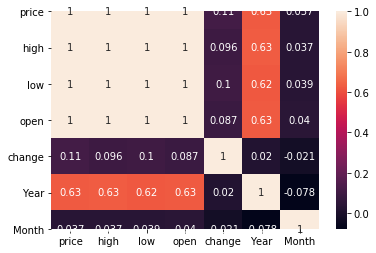

In [65]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

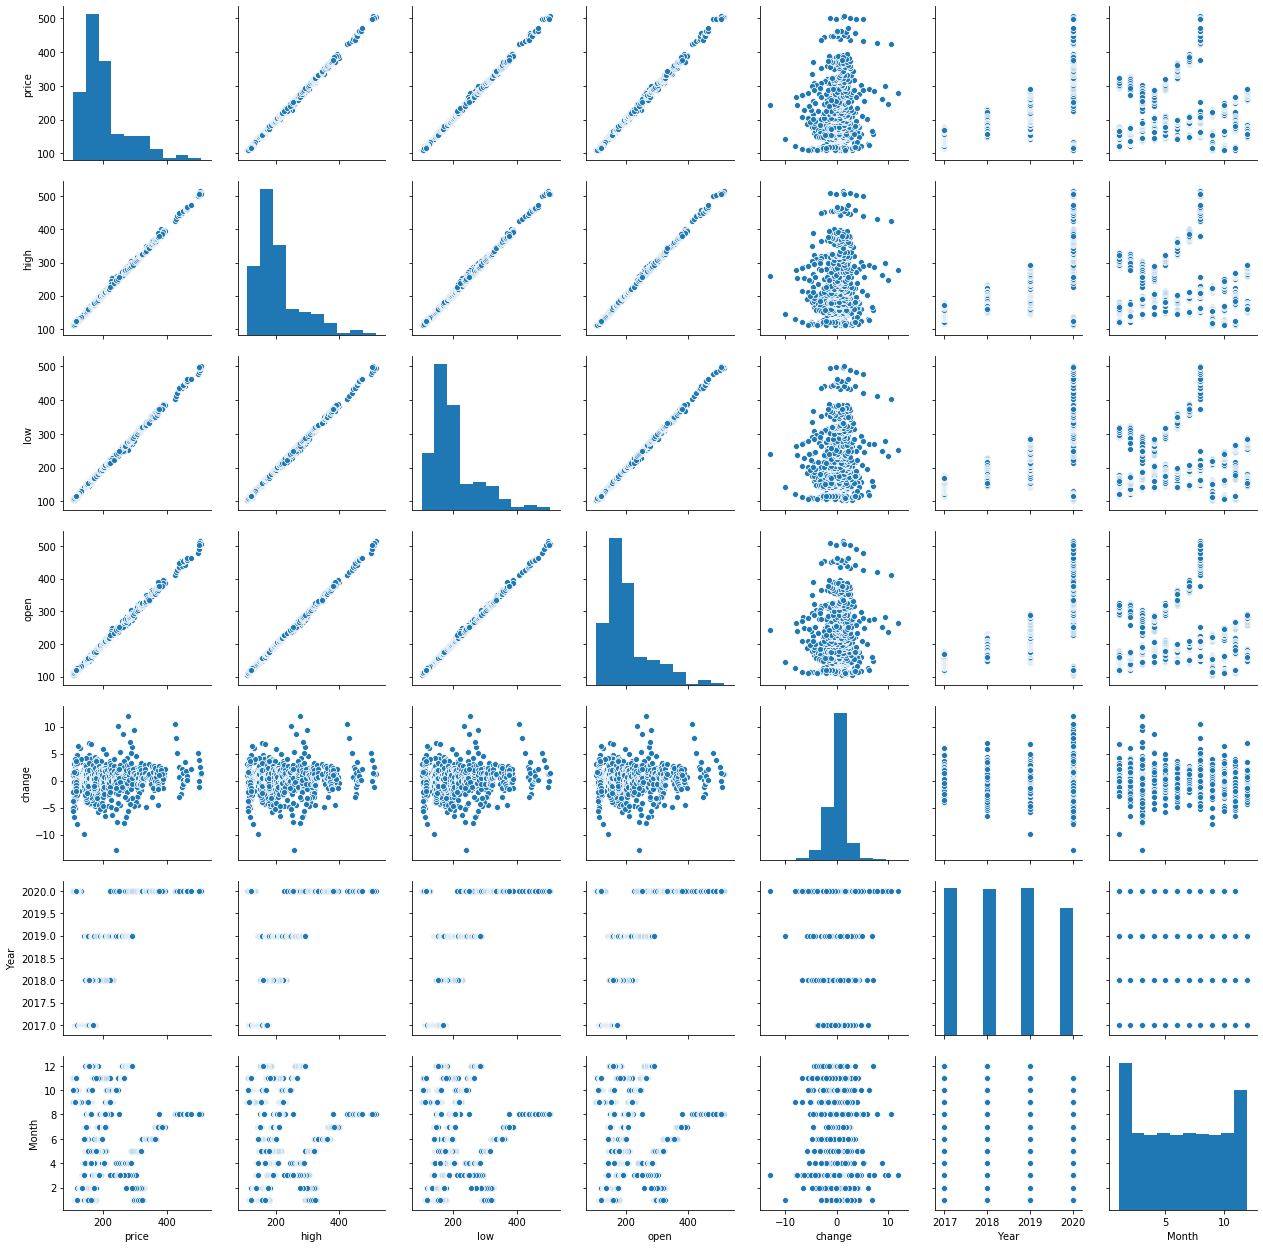

In [66]:
sns.pairplot(df_dropped)

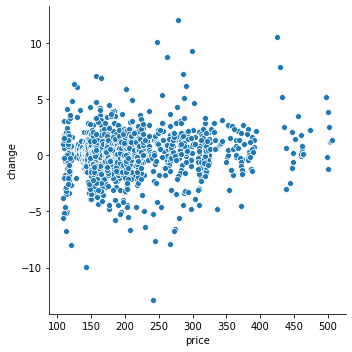

In [74]:
sns.relplot(x='price', y='change',data=df_dropped)

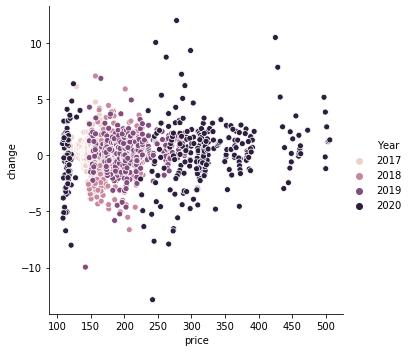

In [72]:
sns.relplot(x='price', y='change', hue='Year',data=df_dropped)

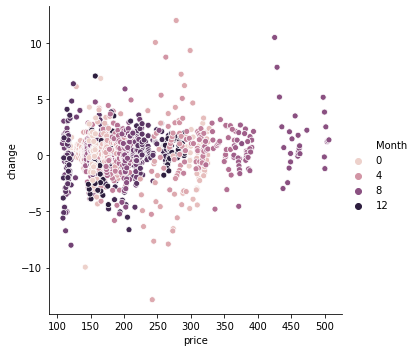

In [78]:
sns.relplot(x='price', y='change', hue='Month',data=df_dropped)

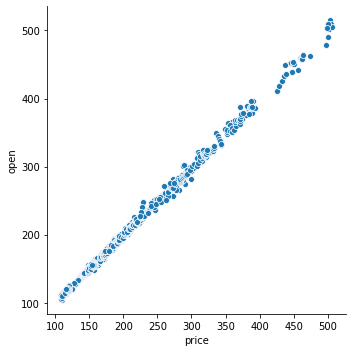

In [68]:
sns.relplot(x='price', y='open', data=df_dropped)

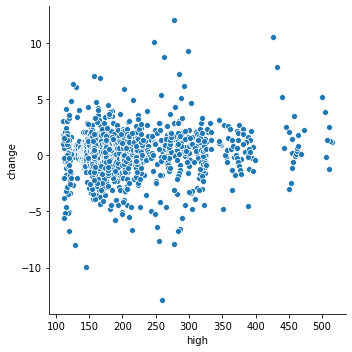

In [69]:
sns.relplot(x='high', y='change', data=df_dropped)

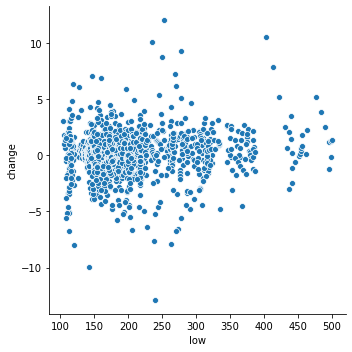

In [70]:
sns.relplot(x='low', y='change', data=df_dropped)

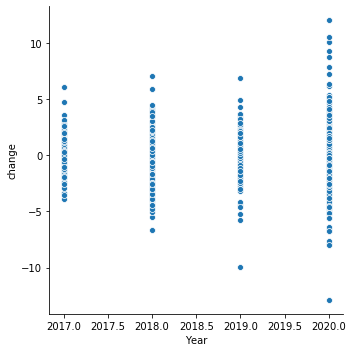

In [71]:
sns.relplot(x='Year', y="change", data=df_dropped)

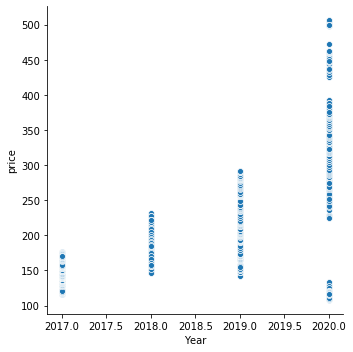

In [75]:
sns.relplot(x='Year', y="price", data=df_dropped)

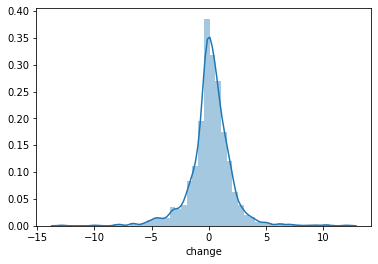

In [39]:
sns.distplot(df_dropped["change"])

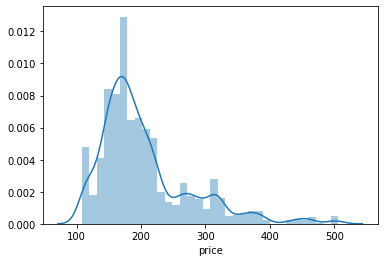

In [40]:
sns.distplot(df_dropped["price"])

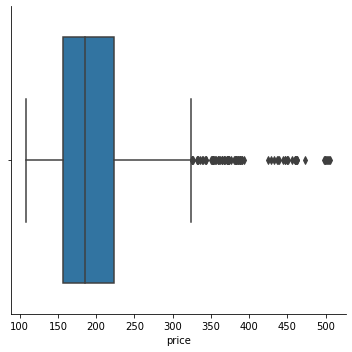

In [76]:
sns.catplot(x="price", kind = "box", data=df_dropped)

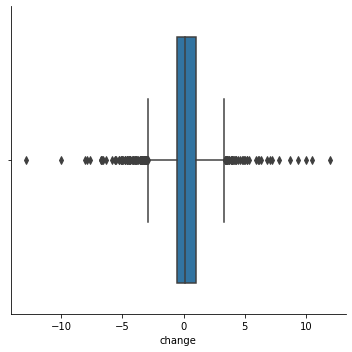

In [77]:
sns.catplot(x="change", kind = "box", data=df_dropped)